In [1]:
from matplotlib.axes import Axes
from script import packetPreprocessing, packetsHandler
import decimal
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math
import random
import gc
import importlib
importlib.reload(packetPreprocessing)
importlib.reload(packetsHandler)
from script.packetPreprocessing import *
from script.packetsHandler import *
import time


In [5]:

wirelens=getwirelen(readPcap(""))

timestamps=readTimestamp("")

timestampsAndWirelens=list(zip(timestamps,wirelens))



In [9]:
packNums0p01,timestamps0p01,byteSlots0p01, byteRates0p01=splitToTimeSlot(timestampsAndWirelens, 0.01)
packNums0p1,timestamps0p1,byteSlots0p1, byteRates0p1=splitToTimeSlot(timestampsAndWirelens, 0.1)
packNums1,timestamps1,byteSlots1, byteRates1=splitToTimeSlot(timestampsAndWirelens, 1)

In [12]:
byteRates0p01[0:10]

[Decimal('6.036186E+8'),
 Decimal('6.509473E+8'),
 Decimal('5.132057E+8'),
 Decimal('4.914291E+8'),
 Decimal('4.202161E+8'),
 Decimal('3.738004E+8'),
 Decimal('4.163417E+8'),
 Decimal('3.602605E+8'),
 Decimal('3.856879E+8'),
 Decimal('5.583263E+8')]

In [13]:
data0p01=pd.DataFrame({
                  'timestamp':timestamps0p01,
                  'byteRates0p01':byteRates0p01,
                  "packNums0p01":  packNums0p01              
                   })

data0p01.to_csv("data_for_0p01s_time_slot.csv",index=False)


data0p1=pd.DataFrame(data={
                  'timestamp':timestamps0p1,
                  'byteRates0p1':byteRates0p1,
                  "packNums0p1":  packNums0p1              
                   })

data0p1.to_csv("data_for_0p1s_time_slot.csv",index=False)

data1=pd.DataFrame(data={
                  'timestamp':timestamps1,
                  'byteRates1':byteRates1,
                  "packNums1":  packNums1              
                   })

data1.to_csv("data_for_1s_time_slot.csv",index=False)



In [2]:

data001 = pd.read_csv("data_for_0p01s_time_slot.csv",index_col=0)
data01 = pd.read_csv("data_for_0p1s_time_slot.csv",index_col=0)
data1 = pd.read_csv("data_for_1s_time_slot.csv",index_col=0)                    



In [20]:
data01["byteRates0p1"]

timestamp
1.521119e+09    477383360.0
1.521119e+09    516887910.0
1.521119e+09    448802440.0
1.521119e+09    465670150.0
1.521119e+09    437106540.0
1.521119e+09    433840930.0
1.521119e+09    456448560.0
1.521119e+09    457154140.0
1.521119e+09    441535200.0
1.521119e+09    448984100.0
1.521119e+09    412276800.0
1.521119e+09    454173630.0
1.521119e+09    440634550.0
1.521119e+09    461193570.0
1.521119e+09    456834220.0
1.521119e+09    437940870.0
1.521119e+09    480019100.0
1.521119e+09    449750410.0
1.521119e+09    448373810.0
1.521119e+09    479299050.0
1.521119e+09    447449140.0
1.521119e+09    449219870.0
1.521119e+09    495061560.0
1.521119e+09    445612890.0
1.521119e+09    515328040.0
1.521119e+09    605320810.0
1.521119e+09    439823090.0
1.521119e+09    475731720.0
1.521119e+09    485483440.0
1.521119e+09    491734360.0
                   ...     
1.521119e+09    404716090.0
1.521119e+09    395212750.0
1.521119e+09    428861470.0
1.521119e+09    431000090.0
1.521119e+

6205

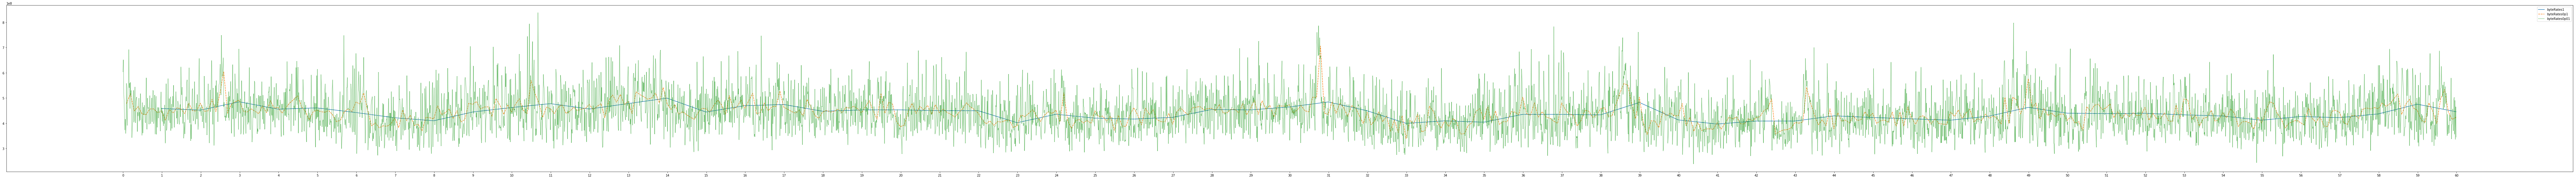

In [23]:
fig=sns.lineplot(data=[data1["byteRates1"],data01["byteRates0p1"],data001["byteRates0p01"]] )

fig.set_xticks(np.arange(data001.index[0],data001.index[-1]+1,1))
fig.set_xticklabels(np.arange(0,60+1,1))
figure=fig.get_figure()
figure.set_size_inches(150,10)
figure.savefig("byterate_for_0_001s_time_slot")
del fig,figure
gc.collect()

In [ ]:
del fig,figure
gc.collect()

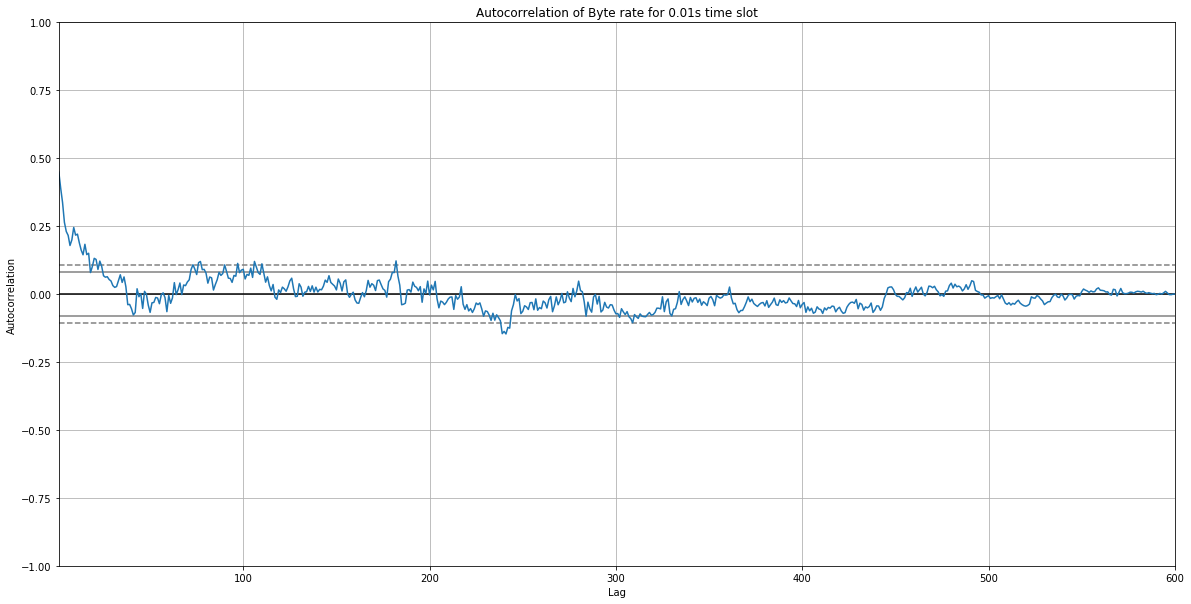

In [7]:
autofig=pd.plotting.autocorrelation_plot(list(map(int,data01["byteRates0p1"])))
autofig.set_title("Autocorrelation of Byte rate for 0.01s time slot")
autofig.get_figure().set_size_inches(20,10)
autofig.get_figure().savefig("autocorrelation_plot_0p1s")

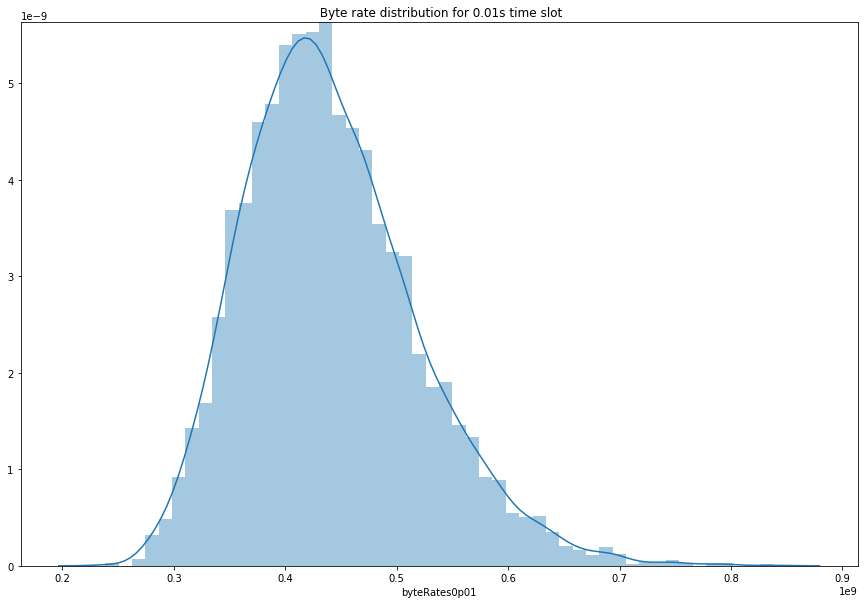

In [6]:
distfig=sns.distplot(data001["byteRates0p01"])
distfig.set_title(" Byte rate distribution for 0.01s time slot")
distfig.get_figure().set_size_inches(15,10)
distfig.get_figure().savefig("dist_plot_0p01s_time_slot")

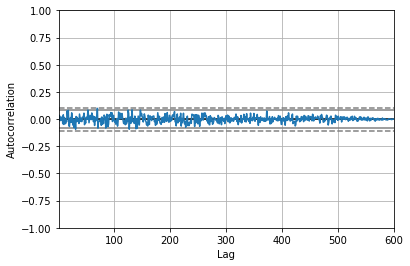

In [10]:


pd.plotting.autocorrelation_plot([random.random() for x in range(600) ])

In [ ]:
"""
Python code for fractional differencing of pandas time series
illustrating the concepts of the article "Preserving Memory in Stationary Time Series" 
by Simon Kuttruf

While this code is dedicated to the public domain for use without permission, the author disclaims any liability in connection with the use of this code.
"""



def getWeights(d,lags):
    # return the weights from the series expansion of the differencing operator
    # for real orders d and up to lags coefficients
    w=[1]
    for k in range(1,lags):
        w.append(-w[-1]*((d-k+1))/k)
    w=np.array(w).reshape(-1,1) 
    return w

def plotWeights(dRange, lags, numberPlots):
    weights=pd.DataFrame(np.zeros((lags, numberPlots)))
    interval=np.linspace(dRange[0],dRange[1],numberPlots)
    for i, diff_order in enumerate(interval):
        weights[i]=getWeights(diff_order,lags)
    weights.columns = [round(x,2) for x in interval]
    fig=weights.plot()
    plt.legend(title='Order of differencing')
    plt.title('Lag coefficients for various orders of differencing')
    plt.xlabel('lag coefficients')
    #plt.grid(False)
    plt.show()

plotWeights([0,1],7,6)

def ts_differencing(series, order, lag_cutoff):
    # return the time series resulting from (fractional) differencing
    # for real orders order up to lag_cutoff coefficients
    
    weights=getWeights(order, lag_cutoff)
    res=0
    for k in range(lag_cutoff):
        res += weights[k]*series.shift(k).fillna(0)
    return res[lag_cutoff:] 


def plotMemoryVsCorr(result, seriesName):
    fig, ax = plt.subplots()
    ax2 = ax.twinx()  
    color1='xkcd:deep red'; color2='xkcd:cornflower blue'
    ax.plot(result.order,result['adf'],color=color1)
    ax.plot(result.order, result['5%'], color='xkcd:slate')
    ax2.plot(result.order,result['corr'], color=color2)
    ax.set_xlabel('order of differencing')
    ax.set_ylabel('adf', color=color1);ax.tick_params(axis='y', labelcolor=color1)
    ax2.set_ylabel('corr', color=color2); ax2.tick_params(axis='y', labelcolor=color2)
    plt.title('ADF test statistics and correlation for %s' % (seriesName))
    plt.show()


from statsmodels.tsa.stattools import adfuller 
def MemoryVsCorr(series, dRange, numberPlots, lag_cutoff, seriesName):
    # return a data frame and plot comparing adf statistics and linear correlation
    # for numberPlots orders of differencing in the interval dRange up to a lag_cutoff coefficients
    
    interval=np.linspace(dRange[0], dRange[1],numberPlots)
    result=pd.DataFrame(np.zeros((len(interval),4)))
    result.columns = ['order','adf','corr', '5%']
    result['order']=interval
    for counter,order in enumerate(interval):
        seq_traf=ts_differencing(series,order,lag_cutoff)
        res=adfuller(seq_traf, maxlag=1, regression='c') #autolag='AIC'
        result.loc[counter,'adf']=res[0]
        result.loc[counter,'5%']=res[4]['5%']
        result.loc[counter,'corr']= np.corrcoef(series[lag_cutoff:].fillna(0),seq_traf)[0,1]
    plotMemoryVsCorr(result, seriesName)    
    return result
